# Avacado Project

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
!pip install xgboost


In [2]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.shape

(18249, 14)

In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
sum(df.duplicated())

0

In [9]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [ ]:
df.drop('type', axis = 1, inplace = True)
#dropping type since it is irrelevant

In [11]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


In [ ]:
df['Month'] = df['Date'].apply(lambda x: x[3:4])
df['Month'] = df['Month'].astype(float)
df['Month']

In [19]:
df.drop('Date',axis = 1, inplace = True)

In [20]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [21]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,5.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,5.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,5.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,5.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,5.0


In [23]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,5.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,5.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,7.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,8.000000


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [49]:
df['region'] = encoder.fit_transform(df['region'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,5.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,5.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,5.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,5.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,5.0


# EDA

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

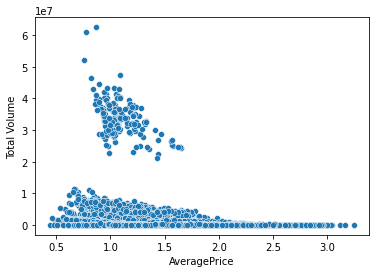

In [27]:
sns.scatterplot(y = 'Total Volume', x = 'AveragePrice', data = df )

price is less if there is increase in volume

<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

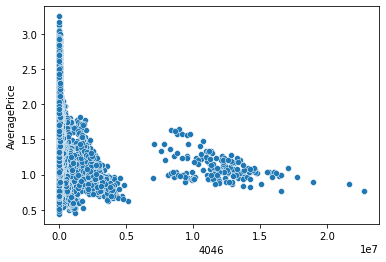

In [29]:
sns.scatterplot(x = '4046', y = 'AveragePrice', data = df )

the prices are less where there is increase in volume in 4046

<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

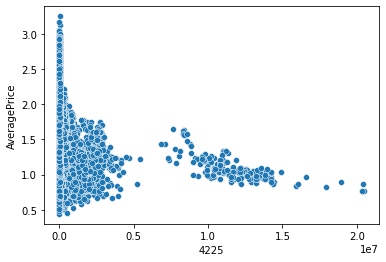

In [30]:
sns.scatterplot(x = '4225', y = 'AveragePrice', data = df )

the prices are less where there is increase in volume in 4225

<AxesSubplot:xlabel='4770', ylabel='AveragePrice'>

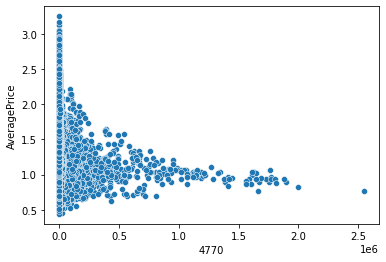

In [31]:
sns.scatterplot(x = '4770', y = 'AveragePrice', data = df)

we can see that the prices are same if there is increase in volume for 4770

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

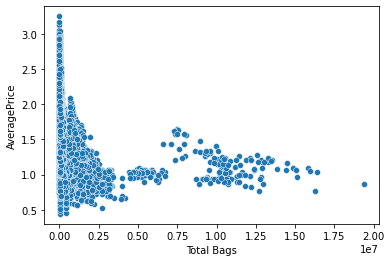

In [32]:
sns.scatterplot(x = 'Total Bags', y = 'AveragePrice', data = df)

there is decrease in average price with the total bags, large , x large and small bag

<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

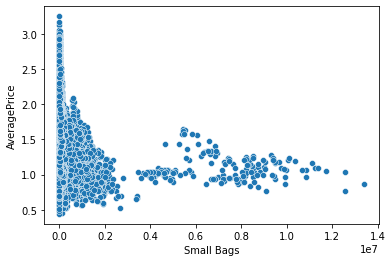

In [33]:
sns.scatterplot(x = 'Small Bags', y = 'AveragePrice', data = df)

<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

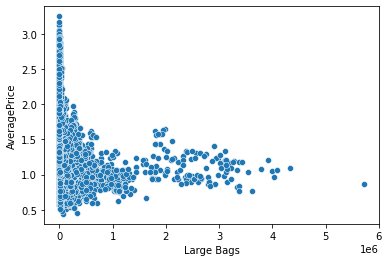

In [34]:
sns.scatterplot(x = 'Large Bags', y = 'AveragePrice', data = df)

<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

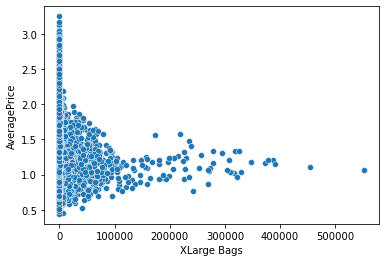

In [35]:
sns.scatterplot(x = 'XLarge Bags', y = 'AveragePrice', data = df)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

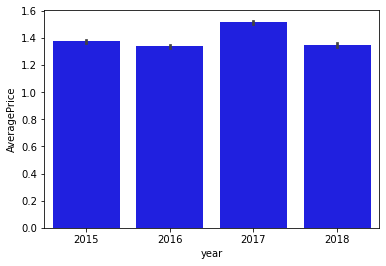

In [37]:
sns.barplot(x = 'year', y = 'AveragePrice',data = df, color = 'blue')

the price were highest in 2017 and lowest in 2016

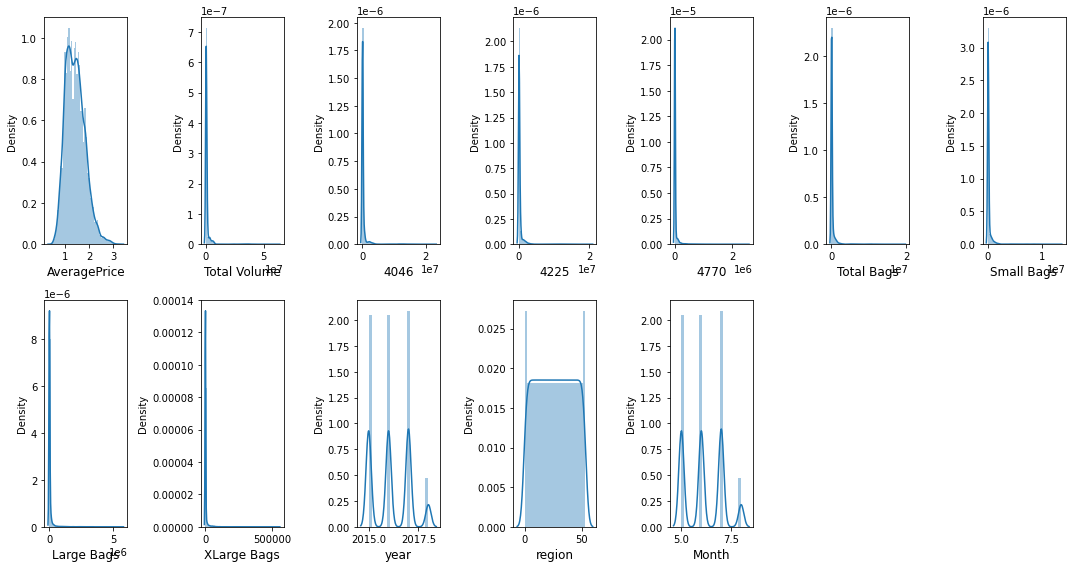

In [43]:
plt.figure(figsize = (15,8))
plotnumber = 1

for column in df:
    if plotnumber<=14:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 12)
               
    plotnumber+=1
plt.tight_layout()

It shows there are some skewness in the data 

# Correlation 

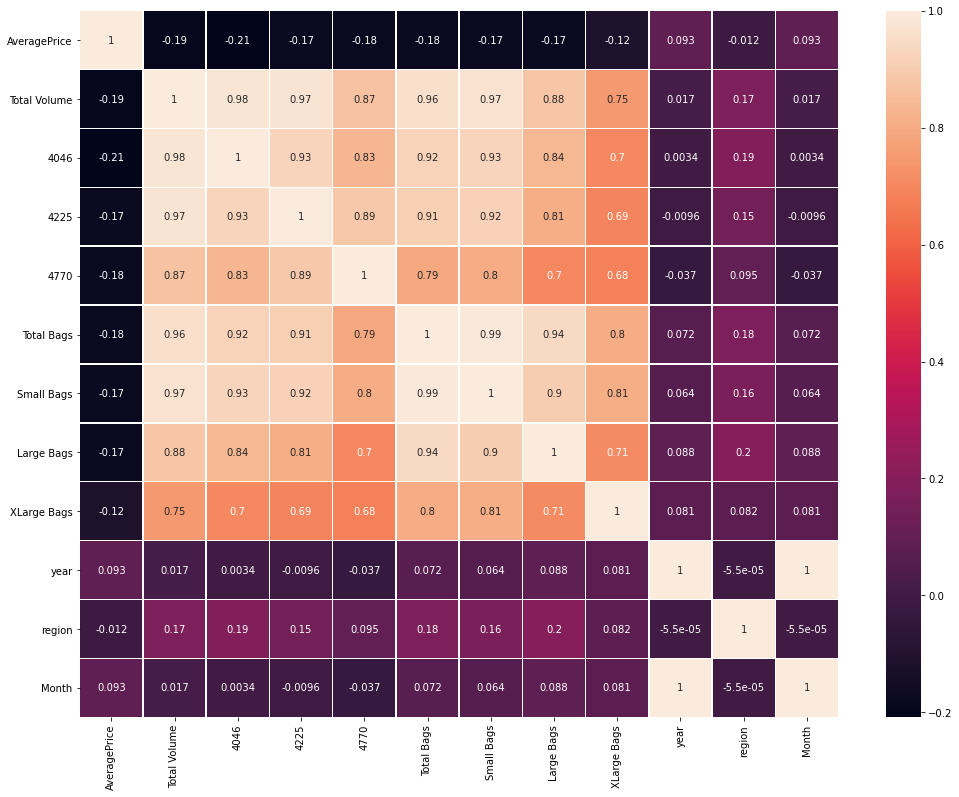

In [47]:
fig, ax = plt.subplots(figsize=(17,13))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

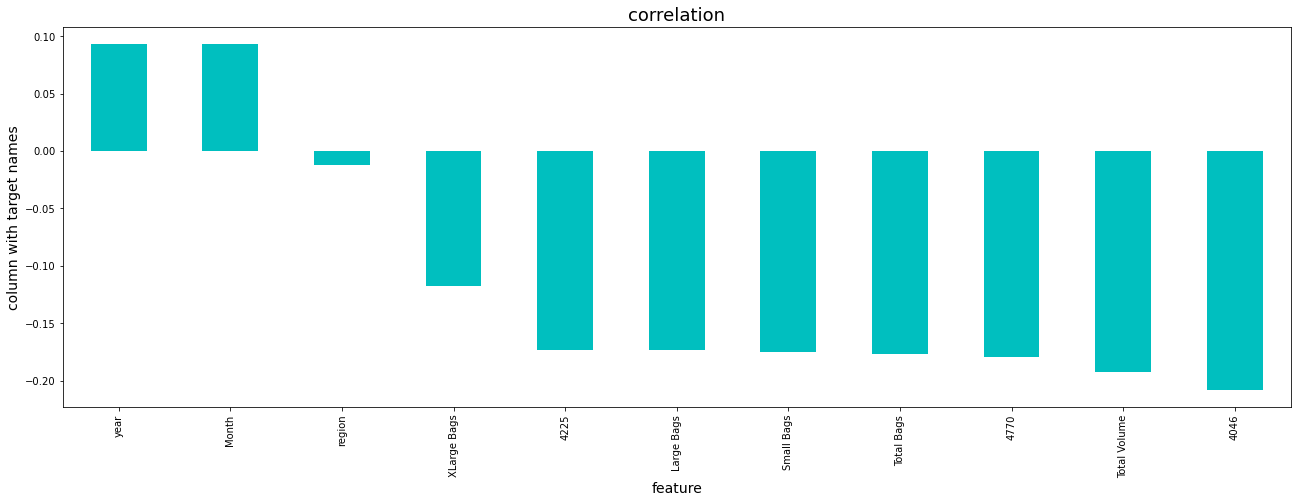

In [50]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

Most of the columns have negative correlation with Average Price.

4046 seems to have highest correlation with Average Price at -0.19 followed by large bags at -0.18.

Total volume, 4046, 4225, 4770, Total bags, small bags and large bags all have high correlation amongst them as seen in the heatmap.

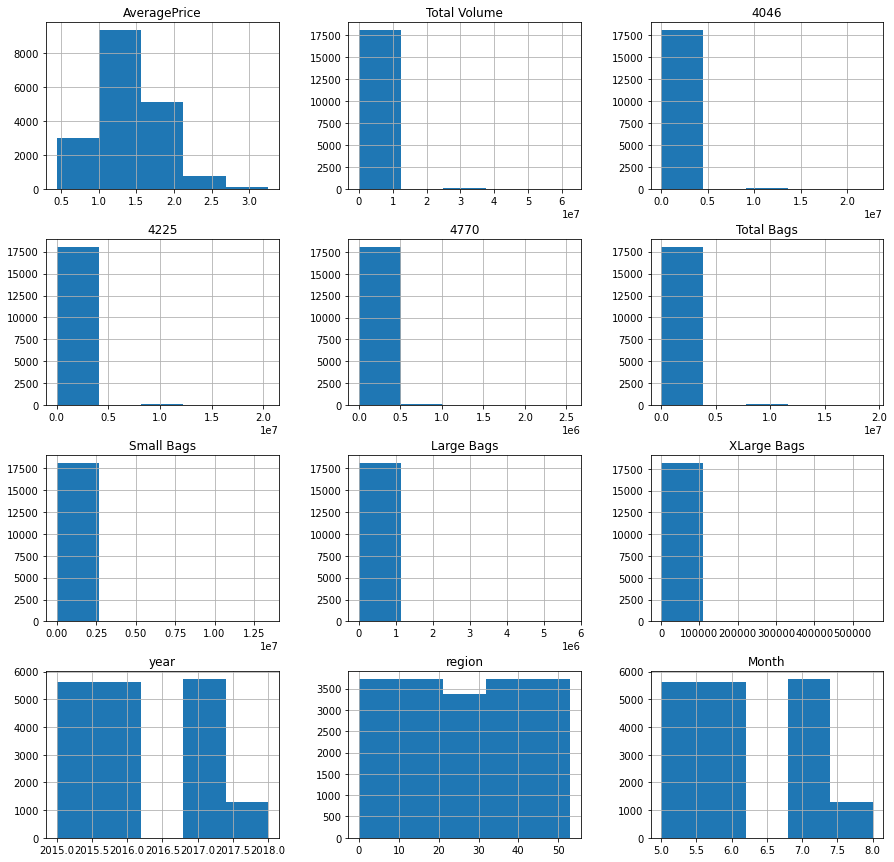

In [51]:
df.hist(bins=5, figsize=(15,15));

# checking the outliers

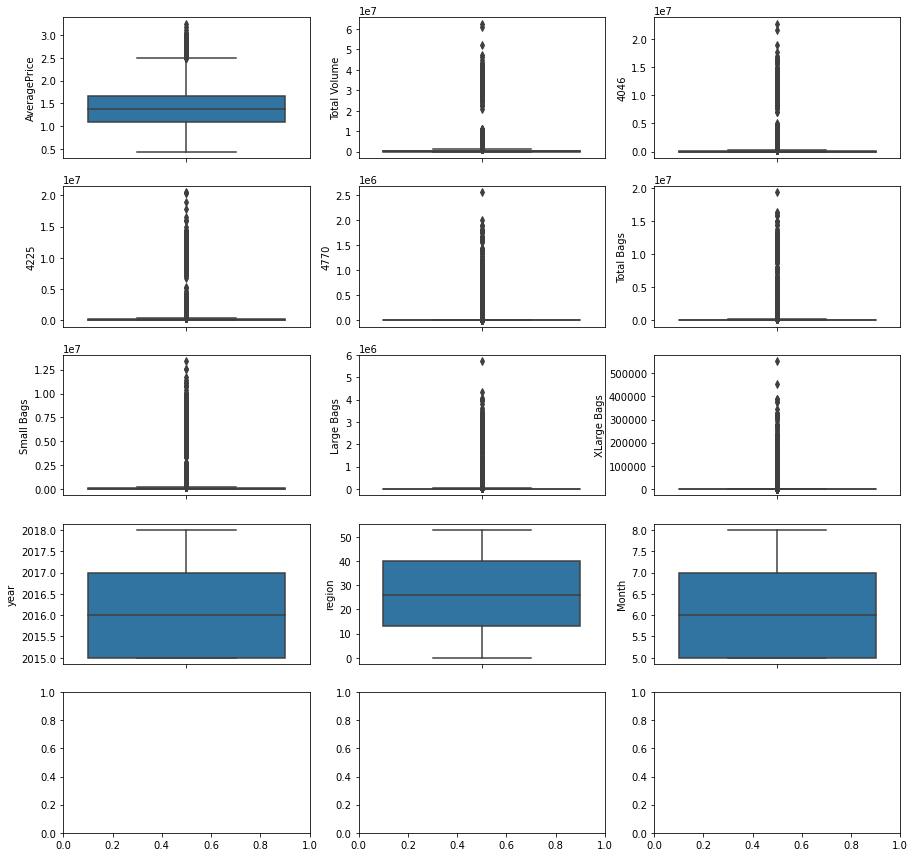

In [52]:
fig,ax = plt.subplots(ncols=3,nrows=5,figsize=(15,15))
index=0
ax = ax.flatten()

for col, value in df.items():
    if col !='type':
        sns.boxplot(y=col,data=df,ax=ax[index])
        index+= 1

as we can see there are outliers present

so removing the outliers using zscore method

In [53]:
from scipy.stats import zscore
z = np.abs(zscore (df))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 1.22128204, 1.7002522 ,
        1.22128204],
       [0.13901962, 0.23042664, 0.23110251, ..., 1.22128204, 1.7002522 ,
        1.22128204],
       [1.18206895, 0.21208462, 0.23100731, ..., 1.22128204, 1.7002522 ,
        1.22128204],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.97050371, 1.70081131,
        1.97050371],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.97050371, 1.70081131,
        1.97050371],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.97050371, 1.70081131,
        1.97050371]])

In [54]:
threshold = 3
print (np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [55]:
df_new = df [(z<3).all(axis = 1)]

In [56]:
df_new.shape

(17651, 12)

In [58]:
print(df.shape)
print(df_new.shape)

(18249, 12)
(17651, 12)


since the loss is less than 10 percent we can proceed

# checking for skewness

In [62]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
region          0.012798
Month           0.229976
dtype: float64

In [63]:
from sklearn.preprocessing import power_transform 
df_New=power_transform(df_new)
df_New=pd.DataFrame(df_New,columns=df_new.columns)

In [64]:
df_New.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
region         -0.257799
Month           0.016536
dtype: float64

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X= pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)

In [66]:
X.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,-0.195352,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.210013,-1.695495,-1.210013
1,-0.143510,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.210013,-1.695495,-1.210013
2,-1.232207,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.210013,-1.695495,-1.210013
3,-0.843387,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.210013,-1.695495,-1.210013
4,-0.324959,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.210013,-1.695495,-1.210013


In [67]:
x = X.drop('AveragePrice', axis = 1)
y = X['AveragePrice']

In [68]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.210013,-1.695495,-1.210013
1,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.210013,-1.695495,-1.210013
2,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.210013,-1.695495,-1.210013
3,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.210013,-1.695495,-1.210013
4,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.210013,-1.695495,-1.210013


In [69]:
y

0       -0.195352
1       -0.143510
2       -1.232207
3       -0.843387
4       -0.324959
           ...   
17646    0.582289
17647    0.789660
17648    1.204402
17649    1.359930
17650    0.556367
Name: AveragePrice, Length: 17651, dtype: float64

# Model Building

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 75)

In [74]:
lm = LinearRegression()
kn = KNeighborsRegressor()
ab = AdaBoostRegressor()
lr = Lasso()
ri = Ridge()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [75]:
models = LinearRegression(),Ridge(),Lasso(), RandomForestRegressor(),XGBRegressor(), KNeighborsRegressor(),AdaBoostRegressor()

In [76]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

In [77]:
for i in models:
    create_model(i)

LinearRegression()
Mean absolute error 0.7605939346202868
Mean squared error 0.868647108270161
Root Mean squared error 0.9320123970581942
R2 Score 0.13974027962973945
---------------------------------------------------------------------------------------------------------
Ridge()
Mean absolute error 0.7607515466679875
Mean squared error 0.8691203649624392
Root Mean squared error 0.9322662521846637
R2 Score 0.13927159255775534
---------------------------------------------------------------------------------------------------------
Lasso()
Mean absolute error 0.8202621167995692
Mean squared error 1.0098267801799847
Root Mean squared error 1.0049013783351999
R2 Score -7.620501955618586e-05
---------------------------------------------------------------------------------------------------------
RandomForestRegressor()
Mean absolute error 0.2866132509693078
Mean squared error 0.16592674942052288
Root Mean squared error 0.4073410725921496
R2 Score 0.8356753879688836
-------------------------

Cross Validation

In [78]:
print(cross_val_score(lr,x,y,cv=5).mean())

-1.1566696748371699


In [79]:
print(cross_val_score(kn,x,y,cv=5).mean())

-1.023883259524972


In [80]:
print(cross_val_score(lm,x,y,cv=5).mean())

-15.556986597758305


In [81]:
print(cross_val_score(ab,x,y,cv=5).mean())

-0.27253883106699783


In [82]:
print(cross_val_score(xgb,x,y,cv=5).mean())

0.3174403057142473


In [83]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.1279177182258996


In [84]:
print(cross_val_score(ri,x,y,cv=5).mean())

-1.2729741388779587


In [86]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

Minimum Mean Absolute error is shown by  KNeighborsRegressor() 0.2857977752770157
Minimum Mean squared error is shown by  RandomForestRegressor() 0.16592674942052288
Minimum Root Mean squared error is shown by  RandomForestRegressor() 0.4073410725921496
Maximun R2 Score is shown by  RandomForestRegressor() 0.8356753879688836


RandomForestRegressor gets 84% is good score than reaming models

# Hyperparameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
import warnings 
warnings.filterwarnings('ignore')

In [122]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, num = 6)]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

In [123]:
GCV = GridSearchCV(RandomForestRegressor(), random_grid, cv=5)

In [124]:
rfrGCV = RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=1, n_estimators=500)
rfrGCV.fit(x_train, y_train)
predGCV = rfrGCV.predict(x_test)
print('R square:', metrics.r2_score(y_test, predGCV))

R square: 0.8384384417589941


In [125]:
prediction = pd.DataFrame({"Predictions":predGCV, "Real Value":y_test})

In [126]:
prediction.round(2)

,Predictions,Real Value
9275,-0.20,-0.07
3312,-1.52,-1.44
15744,0.78,0.69
11717,1.11,1.23
7732,-1.29,-1.26
...,...,...
9188,0.60,0.09
9880,0.21,0.22
16252,0.72,0.25
9574,2.22,2.47


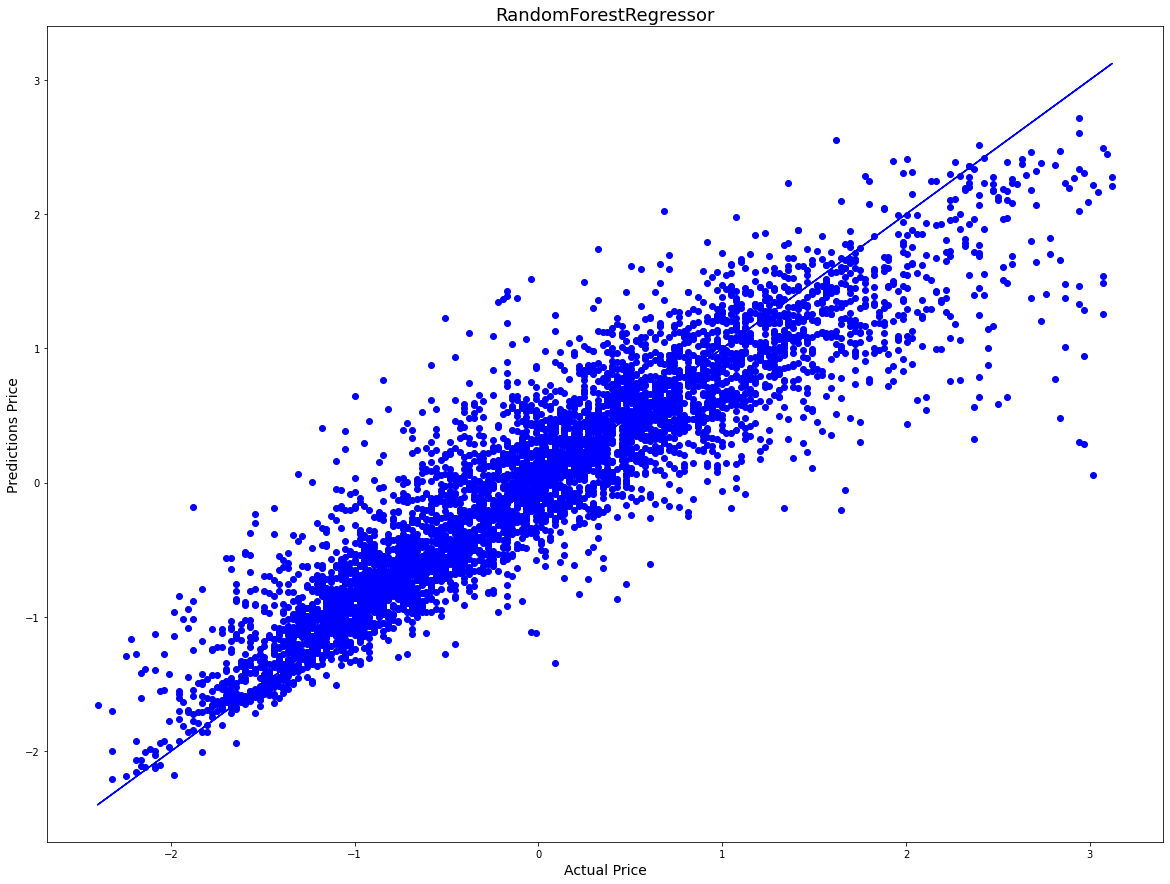

In [133]:
plt.figure(figsize = (20, 15))
plt.scatter(x = y_test, y =predGCV, color = 'b')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Price', fontsize = 14)
plt.ylabel('Predictions Price', fontsize = 14)
plt.title('RandomForestRegressor', fontsize = 18)
plt.show()

In [134]:
import joblib
joblib.dump(xgb,"Avacoda_dataset")

['Avacoda_dataset']